In [99]:
from sentence_transformers import SentenceTransformer, util
from documentizer.pdf import extract_chunks, get_text
import torch
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Detect Natural Breaks in Semantic Similarity
By looking at cosine similarity of sliding window

In [12]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [18]:
chunks = get_text(r'documents\1706.03762.pdf')

In [101]:
CHUNK_SIZE = 256
CHUNK_STEP = 20
TOTAL_STEPS = len(chunks)//CHUNK_STEP - CHUNK_SIZE

In [102]:
embeddings = []
for step in range(1, TOTAL_STEPS):
    embedding = model.encode(chunks[(step*CHUNK_STEP):(step*CHUNK_STEP + CHUNK_SIZE)])
    embeddings.append(embedding)

In [90]:
df = pd.DataFrame(embeddings)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.037227,0.012805,-0.022638,0.016768,-0.016218,-0.030427,-0.057343,0.023535,-0.010573,0.134619,...,-0.042945,-0.006294,0.006760,0.020070,0.042186,0.004084,0.081640,0.004286,-0.000136,-0.006140
1,0.032583,0.000302,-0.018140,-0.026262,0.028915,0.019402,0.030284,0.045449,0.022516,0.075262,...,-0.032821,0.032022,0.011001,0.041498,-0.034830,-0.020465,0.137792,0.053176,-0.021190,-0.016001
2,-0.027513,-0.000169,0.040456,-0.033278,-0.049921,0.000453,0.026943,-0.017821,0.002801,0.080308,...,0.020512,0.004511,0.002962,0.024498,0.000193,0.075980,0.146170,0.044894,-0.044321,-0.003762
3,-0.020789,0.032215,-0.005489,-0.044364,-0.039259,-0.004699,-0.032485,0.032994,0.003700,0.070994,...,0.081309,0.011177,-0.043684,0.066300,-0.051728,0.043815,0.125447,0.075069,-0.068666,-0.017683
4,-0.016939,0.049805,0.020162,-0.028813,0.015257,-0.008551,-0.021837,0.056009,-0.000278,0.048065,...,0.062297,0.078341,-0.010492,0.088197,-0.037554,0.045761,0.123581,0.009480,-0.071711,-0.008996


In [91]:
similarity = [0]
for i in range(0, len(df) - 1):
    sim = util.cos_sim(df.iloc[i], df.iloc[i+1])
    similarity.append(sim.item())
df['Similarity Neighbor'] = similarity

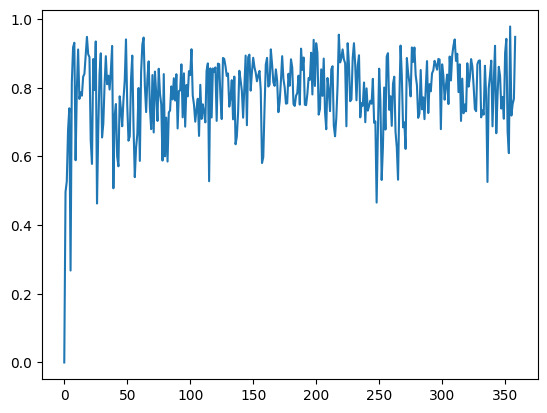

In [100]:
plt.plot(df.index, df['Similarity'])